In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import sympy as sp
import numpy as np
import scipy.optimize as opt
from sympy.utilities.lambdify import lambdify
import scipy.integrate as integrate
from numpy.lib.scimath import sqrt
sp.init_printing()

In [93]:
sk1 = sp.Symbol('k1', real = True)
sk2 = sp.Symbol('k2', real = True)
sA = sp.Symbol('A')
sB = sp.Symbol('B')
sC = sp.Symbol('C')

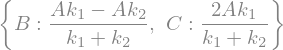

In [94]:
sp.solve([sA + sB - sC, sk1 * (sA - sB) - sk2 * sC], [sB, sC])

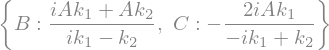

In [95]:
sp.solve([sA + sB - sC, sp.I * sk1 * (sA - sB) + sk2 * sC], [sB, sC])

In [77]:
def k(E, V, m = 1, h = 1):
    return sqrt(2 * m * (E - V)) / h

In [29]:
def PsiLI(x, t, E, V0, A, h = 1):
    return A * np.exp(1j * k(E, 0, h = h) * x) * np.exp(-1j * E * t / h)

In [30]:
def PsiLR(x, t, E, V0, A, h = 1):
    return (1 - k(E, V0, h = h) / k(E, 0, h = h)) /  (1 + k(E, V0, h = h) / k(E, 0, h = h)) * A * np.exp(-1j * k(E, 0, h = h) * x) * np.exp(-1j * E * t / h)

In [31]:
def PsiL(x, t, E, V0, A, h = 1):
    return PsiLI(x, t, E, V0, A, h) + PsiLR(x, t, E, V0, A, h)

In [36]:
def PsiR(x, t, E, V0, A, h = 1):
    return 2 * A / (1 + k(E, V0, h = h) / k(E, 0, h = h)) * np.exp(-1j * E * t / h) * np.exp(1j * k(E, V0, h = h) * x)

In [80]:
fig = plt.figure()
ax = plt.axes(xlim = (-5, 5), ylim = (-3, 3))
ax.grid(ls = '--')
line1, = ax.plot([], [], lw = 3)
line2, = ax.plot([], [], lw = 3)
line3, = ax.plot([], [], lw = 3)

V0 = 1
E = 0.95
A = 1
dt = 0.01
xls = np.linspace(-5, 0, 1000)
xrs = np.linspace(0, 5, 1000)

ax.vlines(0, 0, V0, color = 'C6')
ax.hlines([0, V0], [-5, 0], [0, 5], color = 'C6')
ax.hlines(E, -5, 5, color = 'C3')
plt.close()

    
T = 2 * np.pi / E


def animate(i):
    line1.set_data(xls, PsiLI(xls, dt * i, E, V0, A).real)
    line2.set_data(xls, PsiLR(xls, dt * i, E, V0, A).real)    
    line3.set_data(xrs, PsiR(xls, dt * i, E, V0, A).real)        
    return line1, line2, line3

anim = animation.FuncAnimation(fig, animate, int(T / dt), interval=20, blit=True)
HTML(anim.to_html5_video())

In [56]:
def T(E, V0 = 1):
    return 4 * k(E, 0) * k(E, V0) / (k(E, 0) + k(E, V0))**2

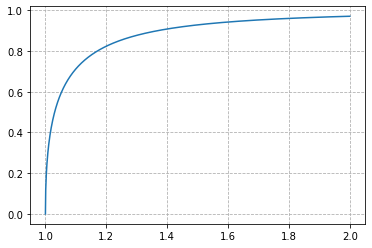

In [60]:
Es = np.linspace(1, 2, 1000)
plt.plot(Es, T(Es))
plt.grid(ls = '--')

In [84]:
sk = sp.Symbol('k', real = True)
sx = sp.Symbol('x', real = True)
sh = sp.Symbol('hbar', real = True)
sm = sp.Symbol('m', real = True)
st = sp.Symbol('t', real = True)
sE = sp.Symbol('E', real = True)
sA = sp.Symbol('A')
sA = sp.Symbol('B')
sA = sp.Symbol('C')

In [71]:
Psi = sA * sp.exp(sp.I * sk * sx) * sp.exp(-sp.I * sE * st / sh)
Psi

In [65]:
def j(expr):
    return sh * (expr.conjugate() * expr.diff(sx) - expr.conjugate().diff(sx) * expr) / (2 * sm * sp.I)

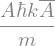

In [72]:
j(Psi)

In [82]:
Psi2 = sA * sp.exp(sk * sx) * sp.exp(-sp.I * sE * st / sh)
Psi2

In [83]:
j(Psi2)

In [3]:
def coswave(x, t, k, w):
    return np.cos(k * x - w(k) * t)

In [6]:
fig = plt.figure()
ax = plt.axes(xlim = (-10, 10), ylim = (-4, 4))
ax.grid(ls = '--')
line1, = ax.plot([], [], lw = 2)

dt = 0.01

plt.close()

xs = np.linspace(-11, 11, 1000)

w = lambda k: k

def animate(i):
    
    line1.set_data(xs, coswave(xs, dt * i, 8, w) + coswave(xs, dt * i, 9, w) + coswave(xs, dt * i, 10, w))
    return line1, 

anim = animation.FuncAnimation(fig, animate, 800, interval=20, blit=True)
HTML(anim.to_html5_video())

In [75]:
def wavepack(ks, w, time = 10, fps = 30, size = None, dpi = None, lw = 2):
    if size is not None and dpi is not None:
        size = (size[0] / dpi, size[1] / dpi)
    
    fig, axs = plt.subplots(len(ks) + 1, 1, sharex = True, gridspec_kw = {'height_ratios' : (1,) * len(ks) + (len(ks),)}, figsize = size, dpi = None)
    for ax in axs[:-1]:
        ax.set_xlim(-10, 10)
        ax.set_ylim(-1.5, 1.5)
        ax.grid(ls = '--')
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    axs[-1].set_xlim(-10, 10)
    y_lim = len(ks) * 1.3
    axs[-1].set_ylim(-y_lim, y_lim)
    axs[-1].grid(ls = '--')
    axs[-1].set_xticklabels([])
    axs[-1].set_yticklabels([])    

    lines = [ax.plot([], [], lw = lw)[0] for ax in axs]

    dt = 1 / fps

    plt.close()

    xs = np.linspace(-11, 11, 1000)
    
    def animate(i):
        superp = np.zeros_like(xs)
        for k, line in zip(ks, lines[:-1]):
            cw = coswave(xs, dt * i, k, w)
            line.set_data(xs, cw)
            superp += cw
        lines[-1].set_data(xs, superp)
        return lines

    anim = animation.FuncAnimation(fig, animate, frames = time * fps, interval = 1000 * dt, blit = True)
    return anim

In [76]:
anim = wavepack((8, 9, 10), lambda k: 10, size = (15, 10))
HTML(anim.to_html5_video())

In [63]:
anim = wavepack((8, 9, 10), lambda k: k - 50)
writermp4 = animation.FFMpegWriter(fps = 60, )
anim.save(r'animation.mp4', writer = writermp4)